# ARIMA 모형법

- 시계열 모형은 정상성의 조건 유무에 따라서 두 가지 형태로 분류된다.
  - 정상성을 가진 시계열 모형 : 자기 회귀모형, 이동평균모형, 자기 회귀 이동평균모형
  - 비정상성을 가진 시계열 모형 : 자기 회귀 누적 이동평균모형

- 정상성 : 시계열이 뚜렷한 추세가 없는 시계열, 즉 시계열의 평균이 시간 축에 평행하게 나타난다. 시계열의 이론은 정상성을 가정하고 전개되기 때문에 비정상 시계열은 정상 시계열로 변환해야 한다. 
- 대부분의 시계열 자료는 비정상성 시계열의 형태를 가진다. 이러한 비정상성 시계열을 모형화하는데 현재 가장 활용도가 높은 ARIMA모형을 이용한다. 이 모형은 세 개의 인수(p,d,q)를 갖는다. 순서대로 자기 회귀모형 차수, 차분 차수, 이동평균 모형의 차수이다. 

- ARIMA 모형으로 시계열 자료를 처리하는 절차는 다음과 같이 모형의 식별, 추정, 그리고 모형 진단의 과정을 거쳐 시계열 자료를 처리한다. 

- 식별
  - ARIMA의 3개 차수를 결정하는 단계. 즉, 현재 시계열 자료가 어떤 모형에 해당하는가를 판단하는 단계. 식별의 수단은 앞에서 살펴본 자기 상관 함수와 부분 자기 상관 함수를 이용한다. 
- 추정
  - 식별된 모형의 파라미터를 추정하는 단계. 파라미터를 추정하는 수단은 최소제곱 법을 이용.
- 진단
  - 모형 식별과 파라미터 추정으로 생성된 모형이 적합한지를 검증하는 단계
  - 적합성 검증의 수단으로 잔차가 백색잡음인지 살펴보고 백색 잡음과 차이가 없으면 적합하다고 할 수 있다.
  - 여기서 백색 잡음이란 모형의 잔차가 불규칙적이고, 독립적으로 분포된 경우를 의미한다. 

---

- ARIMA 모형 시계열 예측
  - 정상성 시계열의 비계절성과 정상성 시계열의 계절성을 갖는 두 자료를 이용하여 분석해보자

- ARIMA 모형 분석 절차
  - 시계열 자료를 이용하여 일반화된 시계열 모형을 선정하고 이에 해당하는 모수 추정을 통해서 모형을 생성. 모형이 유의한지 평가하여 미래 데이터 예측.

---

- 정상성 시계열의 비계절형
  - 비정상성 시계열은 차분을 통해서 정상성 시계열로 바꾸는 과정을 확인한다.
  - 시계열 자료의 추세선을 통해 정상성인지 비정상성인지 확인한다. 
  - 정상성 시계열 : 평균을 중심으로 진폭이 일정하게 나타난다. 만약, 비정상성이면 차분을 통해 정상성으로 변환.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300
2016,3700,,,,,,,,,,,


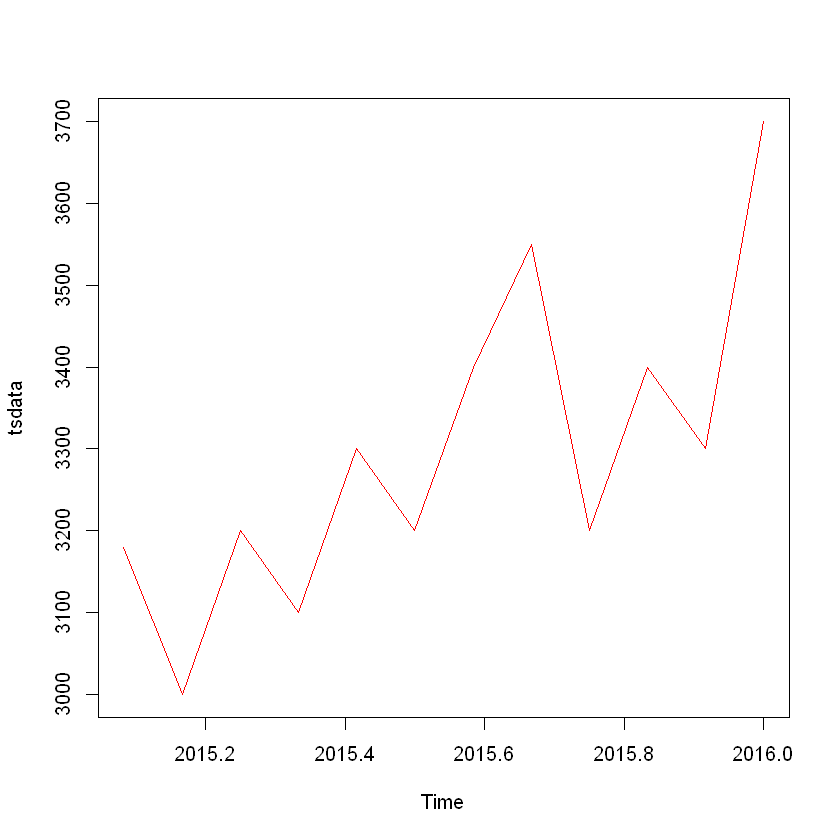

In [4]:
input = c(3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300,3700)

tsdata = ts(input, start = c(2015,2), frequency = 12)
tsdata

plot(tsdata, type = 'l', col = 'red')

- 진폭 일정 X -> 비정상성 시계열 -> 차분 필요 -> 정상성으로 변경
- 차분
  - 일반 차분
  - 계절 차분 - 계절성을 가질 때

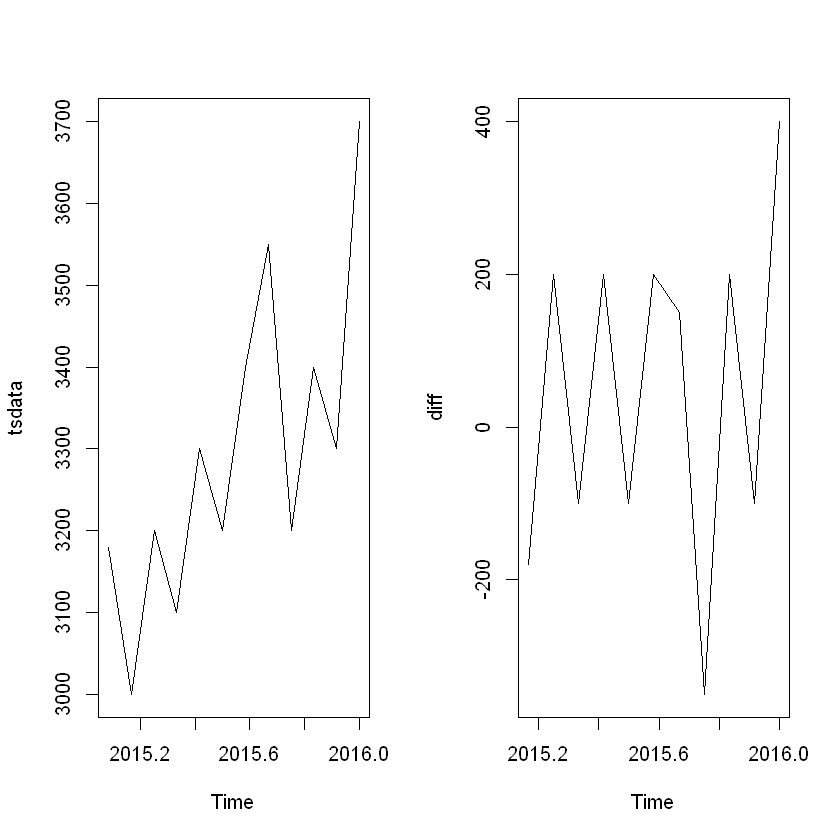

In [5]:
# 정상성 시계열 변환
par(mfrow = c(1,2))
ts.plot(tsdata)

diff = diff(tsdata)
plot(diff)

- 평균 정상화를 위해서 차분 이용하여 비정상성 -> 정상성으로 변경하였음.
- 1차 차분으로 정상화가 되지 않으면 2차 차분을 수행한다.

In [6]:
install.packages('forecast')
library(forecast)


# 모형 식별과 추정
arima = auto.arima(tsdata) 
arima

package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmpae4NBN\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Series: tsdata 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.6891
s.e.   0.2451

sigma^2 = 31644:  log likelihood = -72.4
AIC=148.8   AICc=150.3   BIC=149.59

- ARIMA(1,1,0)로 확인.
- ARIMA(p,d,q) 모형의 정상성 시계열 변환 방법
  - d = 0이면 ARMA(p,q) 모형이며, 정상성을 만족.
  - p = 0이면 IMA(d,q) 모형이며, d번 차분하면 MA(q)모형을 따른다.
  - q = 0이면 IAR(p,d) 모형이며, d번 차분하면 AR(p) 모형을 따른다.

In [8]:
# 모형 생성
model = arima(tsdata, order = c(1,1,0))
model


Call:
arima(x = tsdata, order = c(1, 1, 0))

Coefficients:
          ar1
      -0.6891
s.e.   0.2451

sigma^2 estimated as 28767:  log likelihood = -72.4,  aic = 148.8

- 모형의 적합성 검증을 위해서 잔차가 백색 잡음(모형의 잔차가 불규칙적이고, 독립적으로 분포된 경우인가?)인가를 살핀다.
- 즉, 특정 시차 간의 데이터가 서로 관련성이 없다. 독립적인 관계라는 의미이다.

- 모형 진단하는 방법
  - 자기 상관 함수의 결과가 유의미한 시차가 없는 경우
  - 오차 간에 상관관계가 존재하는지를 검정하는 방법인 Box - Ljung 검정에서 p값이 0.05 이상인 경우

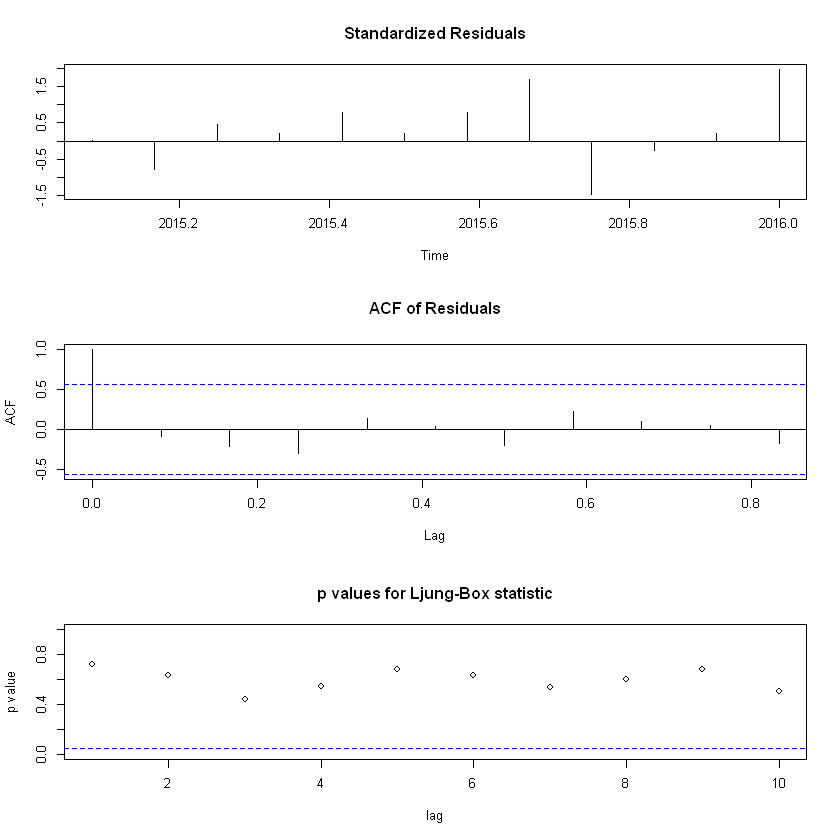

In [9]:
# 모형 진단(모형의 타당성 검정)
# 자기 상관 함수에 의한 모형 진단
tsdiag(model)

- 좋은 시계열 모형은 잔차의 ACF에서 자가 상관이 발견 X
- p-value 값이 0 이상으로 분포되어 있다.
- 따라서 현재 ARIMA 모형은 매우 양호한 시계열 모형이라 할 수 있다.

In [12]:
# 모형 진단(모형의 타당성 검정)
# Box-Ljung에 의한 잔차항 모형 진단
# 모형의 잔차를 이용하는 카이제곱 검정방법으로 시계열 모형이 통계적으로 적절한지를 검정
Box.test(model$residuals, lag = 1, type = 'Ljung')


	Box-Ljung test

data:  model$residuals
X-squared = 0.12353, df = 1, p-value = 0.7252


- 적절하다면, 잔차항은 서로 독립, 동일한 분포를 따른다면 백색잡음과정이라 하며 정상시계열은 이러한 백색잡음 과정으로부터 생성된다.

- 모형진단을 통해서 적절한 모형으로 판단되면 이 모형으로 가까운 미래를 예측하는데 이용

In [14]:
# 미래 예측
fore = forecast(model) # 향후 24개월 예측 = default 
fore

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2016       3424.367 3207.007 3641.727 3091.944 3756.791
Mar 2016       3614.301 3386.677 3841.925 3266.180 3962.421
Apr 2016       3483.421 3198.847 3767.995 3048.203 3918.639
May 2016       3573.608 3272.084 3875.131 3112.467 4034.748
Jun 2016       3511.462 3175.275 3847.649 2997.308 4025.615
Jul 2016       3554.286 3199.003 3909.568 3010.928 4097.643
Aug 2016       3524.776 3143.569 3905.984 2941.770 4107.783
Sep 2016       3545.111 3144.813 3945.408 2932.908 4157.313
Oct 2016       3531.099 3109.224 3952.974 2885.897 4176.301
Nov 2016       3540.754 3100.585 3980.923 2867.574 4213.934
Dec 2016       3534.101 3074.901 3993.300 2831.816 4236.385
Jan 2017       3538.685 3062.192 4015.179 2809.951 4267.420
Feb 2017       3535.526 3041.695 4029.357 2780.277 4290.775
Mar 2017       3537.703 3027.557 4047.849 2757.502 4317.904
Apr 2017       3536.203 3009.958 4062.448 2731.381 4341.025
May 2017       3537.237 2995.565 4078.90

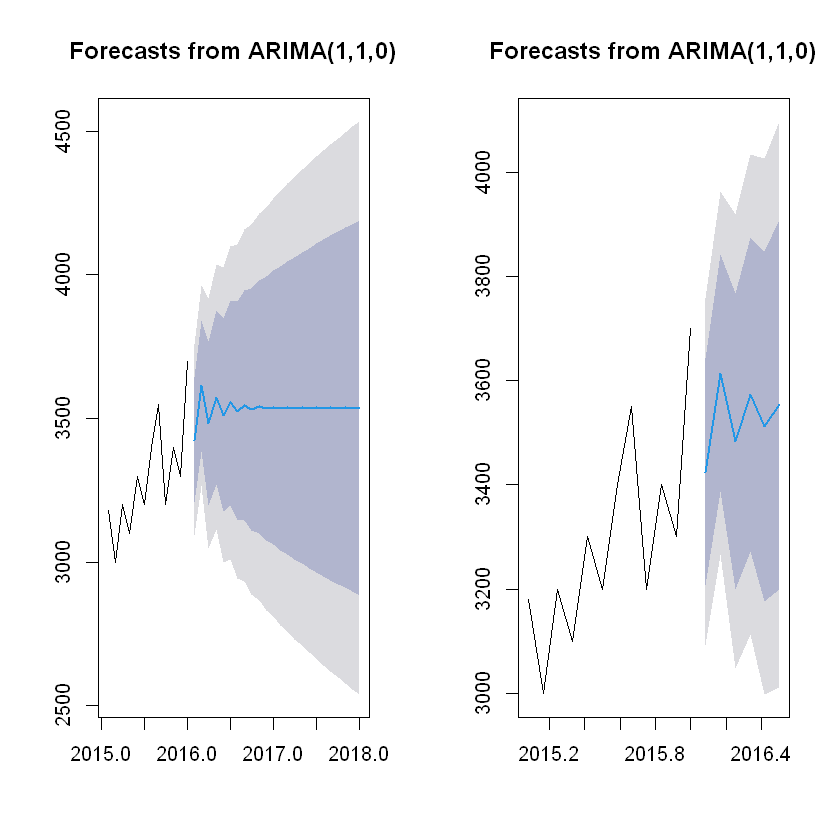

In [15]:
par(mfrow = c(1,2))
plot(fore)
model2 = forecast(model, h = 6)
plot(model2)

- 정상성 시계열의 계절형
  - 비정상성 시계열은 차분을 통해서 정상성 시계열로 바꾸는 과정을 확인

In [16]:
data = c(55,56,45,43,69,75,58,59,66,64,62,65,55,49,67,55,71,78,61,65,69,53,70,75,56,56,65,55,68,80,65,67,77,69,79,82,57,55,63,60,68,70,58,65,70,55,65,70)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,55,56,45,43,69,75,58,59,66,64,62,65
2021,55,49,67,55,71,78,61,65,69,53,70,75
2022,56,56,65,55,68,80,65,67,77,69,79,82
2023,57,55,63,60,68,70,58,65,70,55,65,70


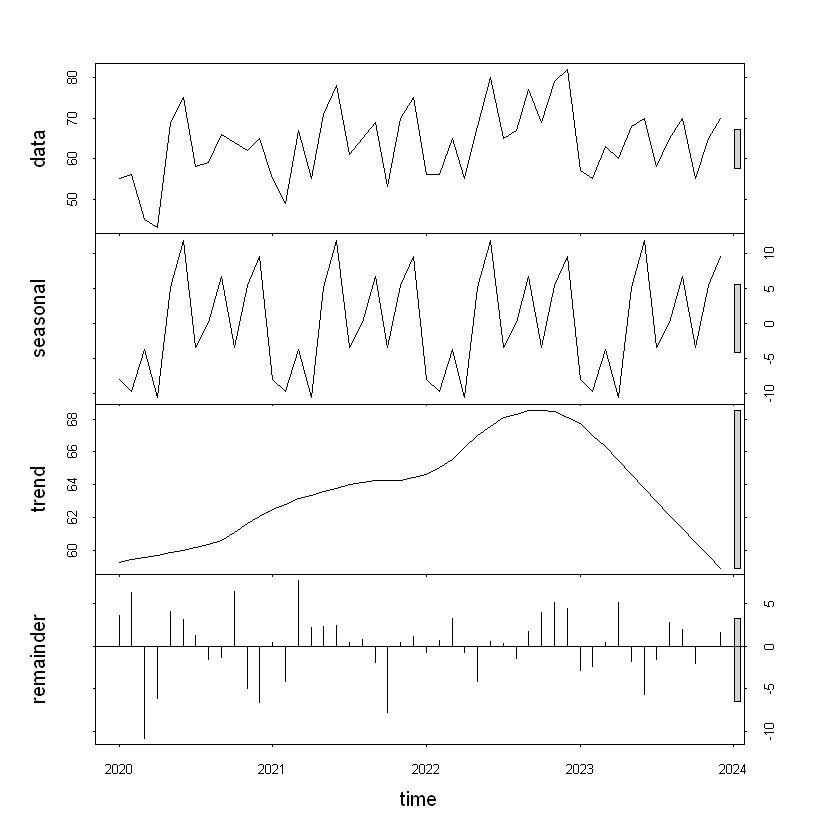

In [18]:
tsdata = ts(data, start = c(2020,1),frequency = 12)
tsdata

ts_feature = stl(tsdata, s.window = 'periodic')
plot(ts_feature)


- 계절성이 뚜렷하게 발견된다. 
- 따라서 tsdata 시계열 자료는 계절성을 갖는 시계열 자료라고 볼 수 있다.

- 차분을 통해서 비정상성 시계열을 정상성 시계열로 변환한다.
- 계절성을 갖는 경우 계절 차분을 적용한다.

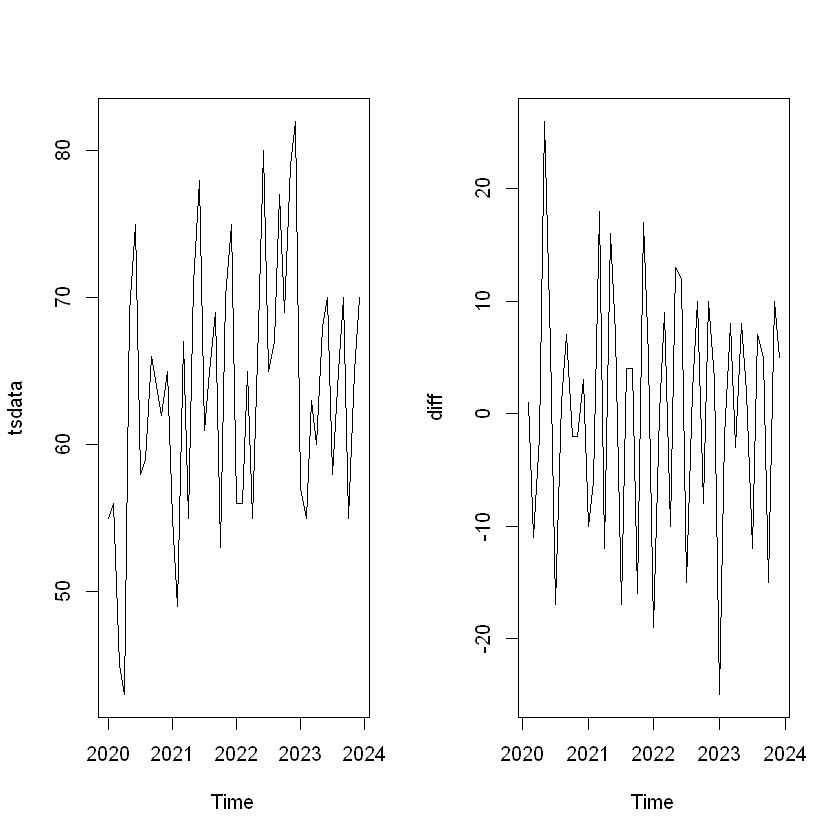

In [19]:
par(mfrow = c(1,2))
ts.plot(tsdata)
diff = diff(tsdata)
plot(diff)

In [20]:
ts_model2 = auto.arima(tsdata)
ts_model2

Series: tsdata 
ARIMA(0,1,1)(1,1,0)[12] 

Coefficients:
          ma1     sar1
      -0.6580  -0.5317
s.e.   0.1421   0.1754

sigma^2 = 41.97:  log likelihood = -116.31
AIC=238.62   AICc=239.4   BIC=243.29

In [21]:
model = arima(tsdata,c(0,1,1), seasonal = list(order = c(1,1,0)))
model


Call:
arima(x = tsdata, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0)))

Coefficients:
          ma1     sar1
      -0.6580  -0.5317
s.e.   0.1421   0.1754

sigma^2 estimated as 39.57:  log likelihood = -116.31,  aic = 238.62

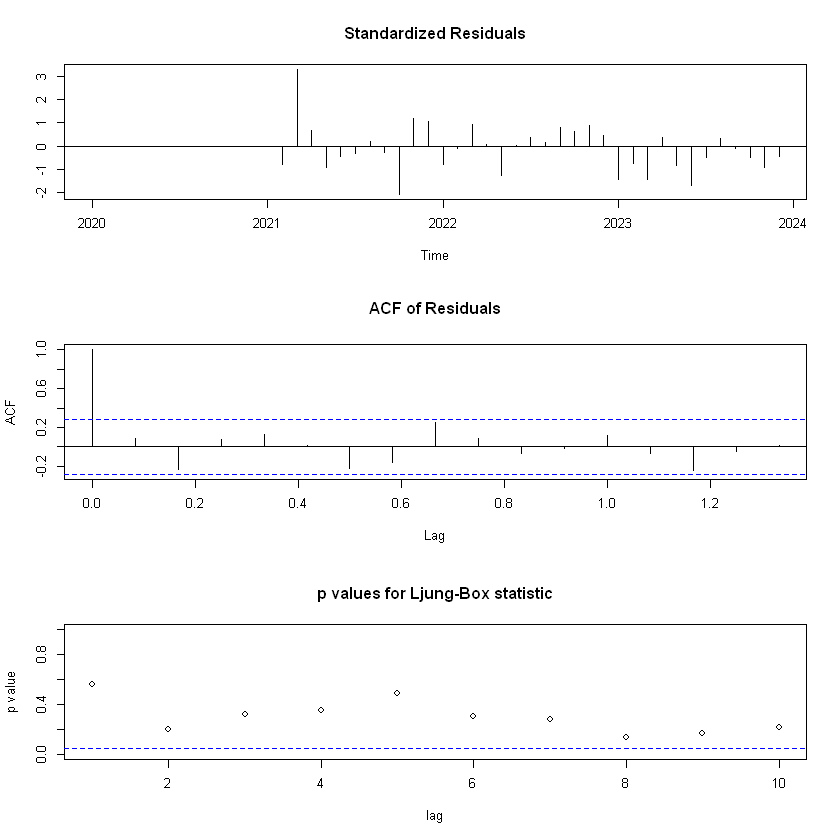

In [22]:
tsdiag(model)

- 매우 양호한 시계열 모형

In [24]:
Box.test(model$residuals, lag = 1, type = 'Ljung')


	Box-Ljung test

data:  model$residuals
X-squared = 0.33656, df = 1, p-value = 0.5618


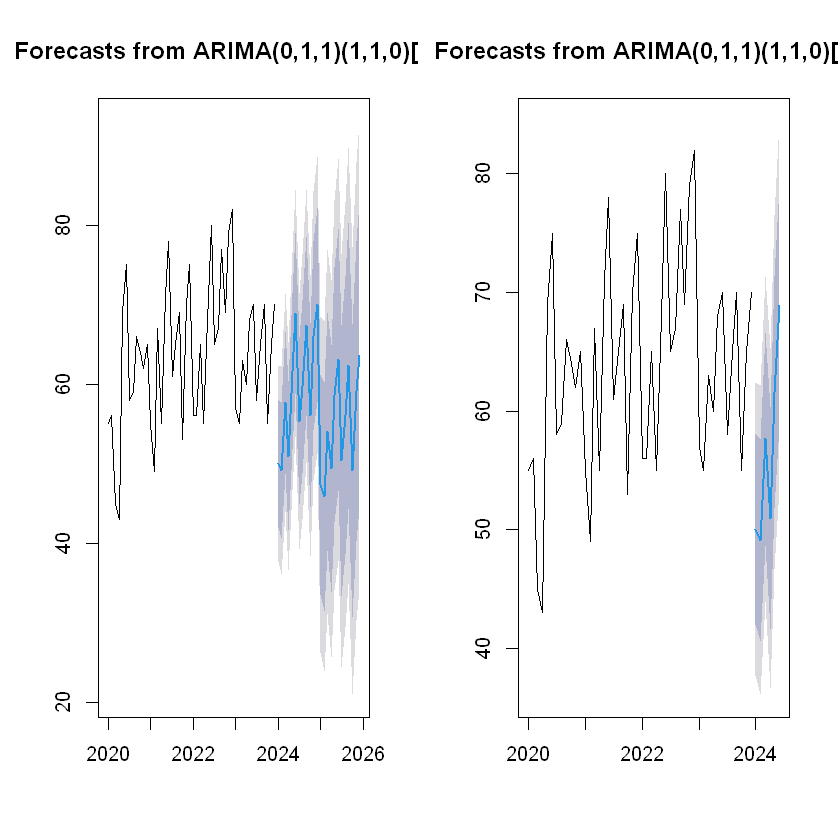

In [25]:
# 미래예측
par(mfrow = c(1,2))
fore = forecast(model, h = 24);plot(fore)
fore2 = forecast(model, h = 6);plot(fore2)